## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud
from apriori_python import apriori

## Read Data and Show it

In [2]:
data=pd.read_csv('Groceries_dataset.csv')

In [3]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Show Information of Data and its Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


## Data Cleansing 

In [6]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
data.duplicated().sum()

759

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data['Date']=pd.to_datetime(data['Date'])

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_1152\1428478067.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


## Data Analysis and Visualizations

In [12]:
top10_member=data['Member_number'].value_counts()[:10]
top10_member=pd.DataFrame(data=top10_member)

In [13]:
mem_number=list(top10_member.index)
mem_number

[3180, 3737, 3050, 2051, 3915, 2433, 2625, 2851, 2394, 3872]

In [14]:
mem_count=list(top10_member['count'].values)
mem_count

[35, 33, 32, 31, 30, 30, 30, 29, 29, 29]

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_1152\3240660881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_member,y=mem_number,x=mem_count,orient='h',palette='magma')


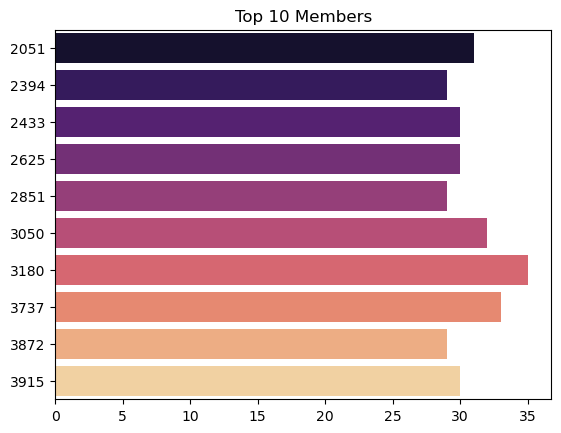

In [15]:
plt.title('Top 10 Members')
sns.barplot(data=top10_member,y=mem_number,x=mem_count,orient='h',palette='magma')
plt.show()

In [16]:
def find_item(item_desc):
    item_lst=item_desc.split()
    return item_lst[-1]

In [17]:
items=data['itemDescription'].apply(find_item)
items

0             fruit
1              milk
2             fruit
3        vegetables
4              milk
            ...    
38760        cheese
38761         candy
38762           bar
38763         juice
38764          food
Name: itemDescription, Length: 38006, dtype: object

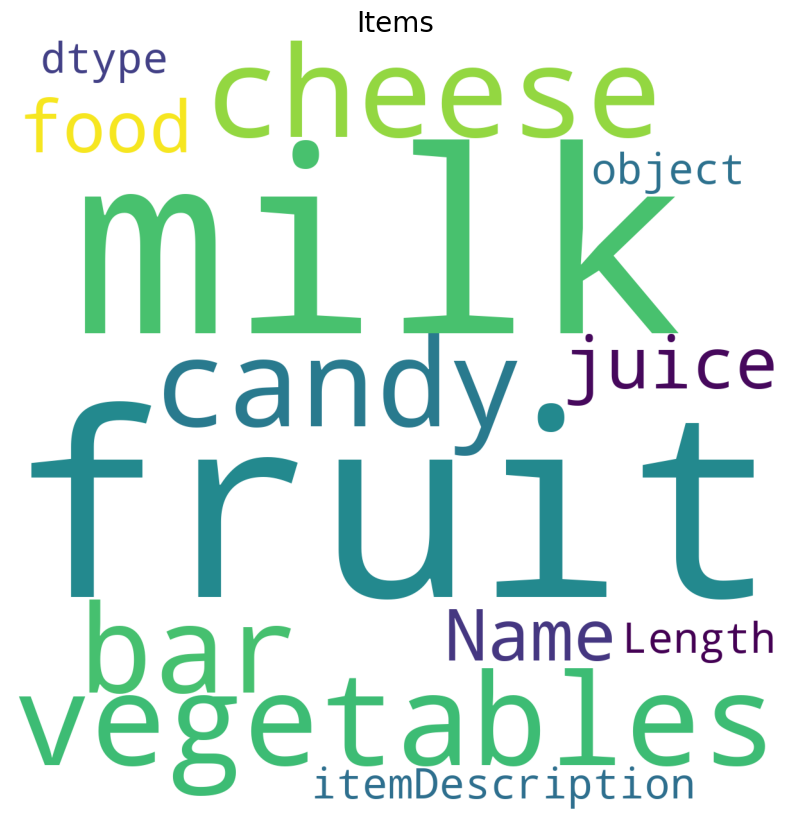

In [18]:
plt.figure(figsize=(10,10))
plt.title('Items',fontsize=20)
word_cloud=WordCloud(background_color='white',width=1200,height=1200,max_words=items.nunique()).generate(str(items))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## Data Preprocessing

In [43]:
def find_trans_items(data):
    trans_items=[]
    for date in data['Date'].unique():
        items=data[data['Date']==date]['itemDescription'].values.tolist()
        trans_items.append(items)
    return trans_items    

In [44]:
transactions=[]
trans_items=[]
for mem in data['Member_number'].unique():
    mem_info=data[data['Member_number']==mem][['Date','itemDescription']]
    trans_items=find_trans_items(mem_info)
    transactions.extend(trans_items)
transactions[0]        

['tropical fruit', 'rolls/buns', 'candy']

## Data Modeling

In [68]:
freqItemSet,association_rules=apriori(transactions,minSup=0.0005,minConf=0.0005)
association_rules=list(association_rules)

In [71]:
association_rules[0]

[{'whole milk'}, {'Instant food products'}, 0.0033855268726195515]

In [72]:
association_rules[-1]

[{'pork', 'sausage'}, {'whole milk'}, 0.391304347826087]